In [1]:
import nltk

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [5]:
import string
from nltk.corpus import stopwords

In [6]:
# nltk.download_shell()
# the above is to download "stopwords" package

In [7]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [8]:
len(messages)

5574

In [10]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message + "\n")
# to view the dataset

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [11]:
messages[0]
# the output looks like the file is a tsv(tab separated vales)

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label', 'message'])
# now it is separated using tabs, and made into a dataframe

In [15]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [18]:
messages['length'] = messages['message'].apply(len)
# creating a new column for length

In [19]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# Now for some EDA...

<AxesSubplot:ylabel='Frequency'>

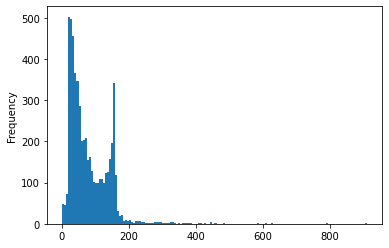

In [21]:
messages['length'].plot.hist(bins = 150)

In [22]:
messages['length'].describe()
# now to see if message length is a distinguishing feature

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [23]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

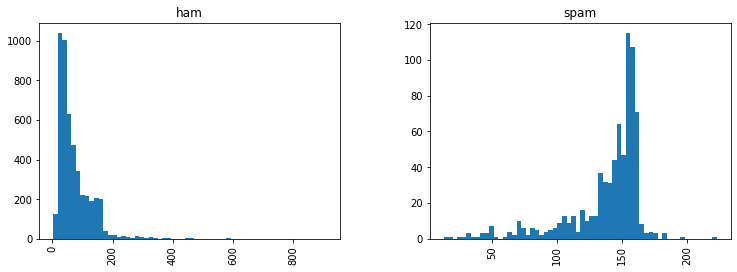

In [24]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

In [25]:
def text_process(mess):
    """
    1. remove punchuation
    2. remove top words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [26]:
# Now to see what happens when we apply the text_process() function to messages dataframe
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [27]:
# we can filter out only the important words in the dataframe. But some words mayi remain, like 'U' instead of 'You'.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer
# to get term freq inverse document freq

from sklearn.naive_bayes import MultinomialNB

In [30]:
from sklearn.model_selection import train_test_split
# now to split the data 

In [31]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [32]:
msg_train.head()

816      Where's my boytoy? I miss you ... What happened?
2012    Do whatever you want. You know what the rules ...
868     PRIVATE! Your 2003 Account Statement for 07808...
1966    Thanks. It was only from tescos but quite nice...
3015       I might go 2 sch. Yar at e salon now v boring.
Name: message, dtype: object

In [33]:
from sklearn.pipeline import Pipeline
# to pipeline all the processes. Instead of doing it manually, sklearn already has a package for it

In [34]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [37]:
pipeline.fit(msg_train, label_train)
# now to fit the model using the training data

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f8ee6a8bd30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [38]:
predictions = pipeline.predict(msg_test)
# now to take predictions using the test data

In [39]:
from sklearn.metrics import classification_report
# to finally judge our model

In [40]:
print(classification_report(label_test, predictions))

precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1464
        spam       1.00      0.75      0.86       208

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

